# Practica 2: Predicción de Series Temporales

# Autores: 

- Alejandro López Cuéllar
- Miguel Ángel Vera Frutos
- Alejandro Belda Fernández


# Importación de librerías

In [133]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import os
import locale
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")  # Ajusta "es_ES.UTF-8" según tu sistema operativo.
locale.setlocale(locale.LC_TIME, "Spanish_Spain.1252")

'Spanish_Spain.1252'

# Definición de la ruta

In [41]:
ruta = "dataset/Aljorrahorarias2017.xls"
ruta2 = "dataset/Aljorrahorarias2018.xls"
ruta3 = "dataset/Aljorrahorarias2019.xls"
ruta4 = "dataset/Aljorrahorarias2020.xls"
ruta5 = "dataset/Aljorrahorarias2021.xls"
ruta6 = "dataset/Aljorrahorarias2022.xls"


In [42]:
# Leer el archivo completo
df = pd.read_excel(ruta, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df["Fecha"] = df["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df.set_index("Fecha", inplace=True)


# Leer el archivo completo
df2 =  pd.read_excel(ruta2, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df2["Fecha"] = df2["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df2.set_index("Fecha", inplace=True)

# Leer el archivo completo
df3 =  pd.read_excel(ruta3, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df3["Fecha"] = df3["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df3.set_index("Fecha", inplace=True)

# Leer el archivo completo
df4 =  pd.read_excel(ruta4, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df4["Fecha"] = df4["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df4.set_index("Fecha", inplace=True)

# Leer el archivo completo
df5 =  pd.read_excel(ruta5, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df5["Fecha"] = df5["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df5.set_index("Fecha", inplace=True)

# Leer el archivo completo
df6 =  pd.read_excel(ruta6, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df6["Fecha"] = df6["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df6.set_index("Fecha", inplace=True)




*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Fecha"] = df["Fecha"].dt.floor('H')
C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2["Fecha"] = df2["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df3["Fecha"] = df3["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df4["Fecha"] = df4["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df5["Fecha"] = df5["Fecha"].dt.floor('H')
C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df6["Fecha"] = df6["Fecha"].dt.floor('H')


In [43]:
data= pd.concat([df,df2,df3,df4,df5,df6])

# Guardar en un archivo CSV
df.to_csv('dataset.csv', index=False)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2017-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    47992 non-null  float64
 1   NO2 (µg/m³N)   47992 non-null  float64
 2   SO2 (µg/m³N)   46390 non-null  float64
 3   O3 (µg/m³N)    46626 non-null  float64
 4   TMP (ºC)       51251 non-null  float64
 5   HR (% H.R.)    51251 non-null  float64
 6   NOX (µg/m³N)   47992 non-null  float64
 7   DD (grados)    51251 non-null  float64
 8   PRB (mb)       51251 non-null  float64
 9   RS (W/m³)      51251 non-null  float64
 10  VV (m/s)       51252 non-null  float64
 11  C6H6 (µg/m³N)  14069 non-null  float64
 12  C7H8 (µg/m³N)  14069 non-null  float64
 13  XIL (µg/m³N)   14069 non-null  float64
 14  PM10 (µg/m³N)  49744 non-null  float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 6.8 MB


In [45]:
data.asfreq('1h')
# data.asfreq("D")

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N),Ruido (dBA)
Fecha,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.0,30.0,15.0,43.0,10.0,85.0,37.0,299.0,1031.0,2.0,1.0,NaN,NaN,NaN,26.00,NaN
2017-01-01 01:00:00,4.0,27.0,12.0,41.0,9.0,84.0,34.0,300.0,1030.0,2.0,1.0,NaN,NaN,NaN,25.00,NaN
2017-01-01 02:00:00,5.0,25.0,14.0,39.0,9.0,86.0,33.0,300.0,1030.0,2.0,1.0,NaN,NaN,NaN,21.00,NaN
2017-01-01 03:00:00,3.0,16.0,15.0,43.0,8.0,85.0,21.0,301.0,1029.0,3.0,1.0,NaN,NaN,NaN,18.00,NaN
2017-01-01 04:00:00,4.0,15.0,14.0,46.0,8.0,84.0,22.0,302.0,1029.0,2.0,1.0,NaN,NaN,NaN,16.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2.5,10.0,4.6,57.6,16.0,77.0,13.9,185.0,1024.0,2.0,1.2,NaN,NaN,NaN,31.75,NaN
2022-12-31 20:00:00,4.6,17.5,5.0,28.2,14.0,81.0,24.6,235.0,1025.0,2.0,1.0,NaN,NaN,NaN,53.27,NaN
2022-12-31 21:00:00,3.9,12.9,4.9,27.4,13.0,88.0,18.8,280.0,1025.0,2.0,1.0,NaN,NaN,NaN,55.28,NaN


In [46]:
data.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N),Ruido (dBA)
Fecha,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.0,30.0,15.0,43.0,10.0,85.0,37.0,299.0,1031.0,2.0,1.0,NaN,NaN,NaN,26.0,NaN
2017-01-01 01:00:00,4.0,27.0,12.0,41.0,9.0,84.0,34.0,300.0,1030.0,2.0,1.0,NaN,NaN,NaN,25.0,NaN
2017-01-01 02:00:00,5.0,25.0,14.0,39.0,9.0,86.0,33.0,300.0,1030.0,2.0,1.0,NaN,NaN,NaN,21.0,NaN
2017-01-01 03:00:00,3.0,16.0,15.0,43.0,8.0,85.0,21.0,301.0,1029.0,3.0,1.0,NaN,NaN,NaN,18.0,NaN
2017-01-01 04:00:00,4.0,15.0,14.0,46.0,8.0,84.0,22.0,302.0,1029.0,2.0,1.0,NaN,NaN,NaN,16.0,NaN


In [47]:
fechas_esperadas =  pd.date_range(start=data.index.min(), end=data.index.max(), freq='1h')
#fechas_esperadas =  pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
fechas_perdidas = fechas_esperadas.difference(data.index)
fechas_perdidas

DatetimeIndex([], dtype='datetime64[ns]', freq='h')

In [48]:
print(f'Tenemos un tota de {len(fechas_perdidas)} fechas perdidas')

Tenemos un tota de 0 fechas perdidas


In [49]:
data = data.reindex(fechas_esperadas)


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2017-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: h
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    47992 non-null  float64
 1   NO2 (µg/m³N)   47992 non-null  float64
 2   SO2 (µg/m³N)   46390 non-null  float64
 3   O3 (µg/m³N)    46626 non-null  float64
 4   TMP (ºC)       51251 non-null  float64
 5   HR (% H.R.)    51251 non-null  float64
 6   NOX (µg/m³N)   47992 non-null  float64
 7   DD (grados)    51251 non-null  float64
 8   PRB (mb)       51251 non-null  float64
 9   RS (W/m³)      51251 non-null  float64
 10  VV (m/s)       51252 non-null  float64
 11  C6H6 (µg/m³N)  14069 non-null  float64
 12  C7H8 (µg/m³N)  14069 non-null  float64
 13  XIL (µg/m³N)   14069 non-null  float64
 14  PM10 (µg/m³N)  49744 non-null  float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 6.8 MB


In [51]:
data.isna().sum()

NO (µg/m³N)       4592
NO2 (µg/m³N)      4592
SO2 (µg/m³N)      6194
O3 (µg/m³N)       5958
TMP (ºC)          1333
HR (% H.R.)       1333
NOX (µg/m³N)      4592
DD (grados)       1333
PRB (mb)          1333
RS (W/m³)         1333
VV (m/s)          1332
C6H6 (µg/m³N)    38515
C7H8 (µg/m³N)    38515
XIL (µg/m³N)     38515
PM10 (µg/m³N)     2840
Ruido (dBA)      52584
dtype: int64

In [52]:
data = data.drop(columns=['Ruido (dBA)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)'])

In [53]:
data.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),PM10 (µg/m³N)
2017-01-01 00:00:00,5.0,30.0,15.0,43.0,10.0,85.0,37.0,299.0,1031.0,2.0,1.0,26.0
2017-01-01 01:00:00,4.0,27.0,12.0,41.0,9.0,84.0,34.0,300.0,1030.0,2.0,1.0,25.0
2017-01-01 02:00:00,5.0,25.0,14.0,39.0,9.0,86.0,33.0,300.0,1030.0,2.0,1.0,21.0
2017-01-01 03:00:00,3.0,16.0,15.0,43.0,8.0,85.0,21.0,301.0,1029.0,3.0,1.0,18.0
2017-01-01 04:00:00,4.0,15.0,14.0,46.0,8.0,84.0,22.0,302.0,1029.0,2.0,1.0,16.0


In [54]:
duplicates = data.index.duplicated()
print(data.index[duplicates])
print(data.index.is_unique)

DatetimeIndex([], dtype='datetime64[ns]', freq='h')
True


In [55]:
from sklearn.impute import KNNImputer

# Configurar el imputador KNN
imputer = KNNImputer(n_neighbors=10)

# Aplicar KNN imputación
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Mostrar resultados
print("Antes de KNN:")
print(data)
print("\nDespués de KNN:")
print(data_imputed)

Antes de KNN:
                     NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  \
2017-01-01 00:00:00          5.0          30.0          15.0         43.0   
2017-01-01 01:00:00          4.0          27.0          12.0         41.0   
2017-01-01 02:00:00          5.0          25.0          14.0         39.0   
2017-01-01 03:00:00          3.0          16.0          15.0         43.0   
2017-01-01 04:00:00          4.0          15.0          14.0         46.0   
...                          ...           ...           ...          ...   
2022-12-31 19:00:00          2.5          10.0           4.6         57.6   
2022-12-31 20:00:00          4.6          17.5           5.0         28.2   
2022-12-31 21:00:00          3.9          12.9           4.9         27.4   
2022-12-31 22:00:00          6.3          18.4           5.2         23.2   
2022-12-31 23:00:00          2.9          11.2           4.9         32.7   

                     TMP (ºC)  HR (% H.R.)  NOX (µg/m³N)  DD 

In [62]:
# Diccionario para almacenar los resultados de imputación
imputed_datasets = {}

# Probar diferentes números de vecinos
for n in [2, 5, 7, 10]:
    imputer = KNNImputer(n_neighbors=n)
    imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    imputed_data.index = data.index
    imputed_datasets[n] = imputed_data  # Almacenar el resultado en el diccionario
    
    print(f"\nImputación con {n} vecinos:")
    print(imputed_data.head())


Imputación con 2 vecinos:
                     NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  \
2017-01-01 00:00:00          5.0          30.0          15.0         43.0   
2017-01-01 01:00:00          4.0          27.0          12.0         41.0   
2017-01-01 02:00:00          5.0          25.0          14.0         39.0   
2017-01-01 03:00:00          3.0          16.0          15.0         43.0   
2017-01-01 04:00:00          4.0          15.0          14.0         46.0   

                     TMP (ºC)  HR (% H.R.)  NOX (µg/m³N)  DD (grados)  \
2017-01-01 00:00:00      10.0         85.0          37.0        299.0   
2017-01-01 01:00:00       9.0         84.0          34.0        300.0   
2017-01-01 02:00:00       9.0         86.0          33.0        300.0   
2017-01-01 03:00:00       8.0         85.0          21.0        301.0   
2017-01-01 04:00:00       8.0         84.0          22.0        302.0   

                     PRB (mb)  RS (W/m³)  VV (m/s)  PM10 (µg/m³N)  
201

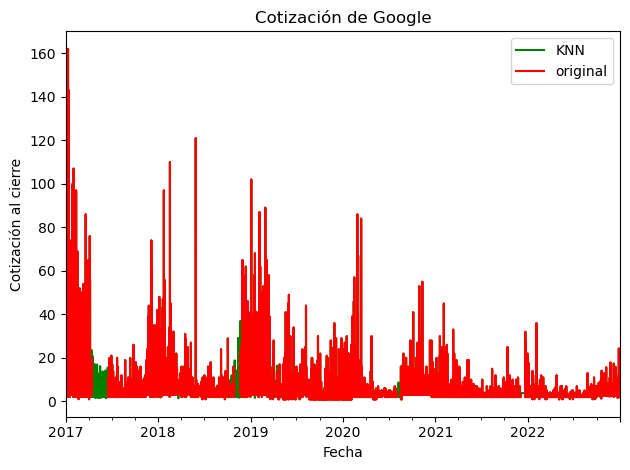

In [67]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['KNN','original'])
plt.tight_layout()

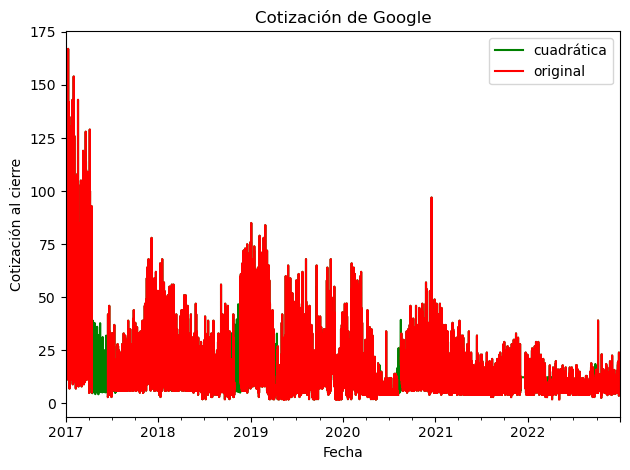

In [73]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO2 (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO2 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

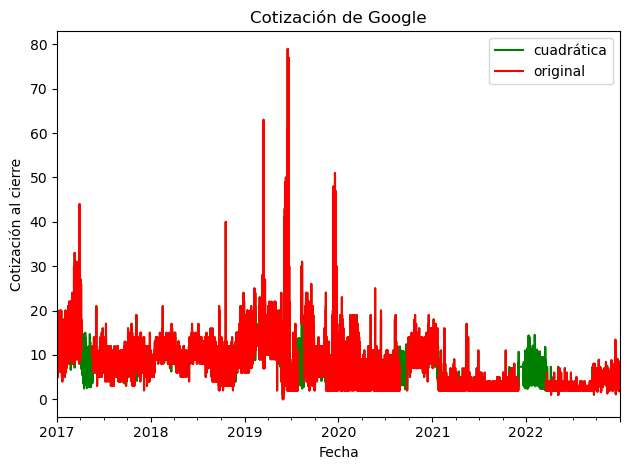

In [77]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["SO2 (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["SO2 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

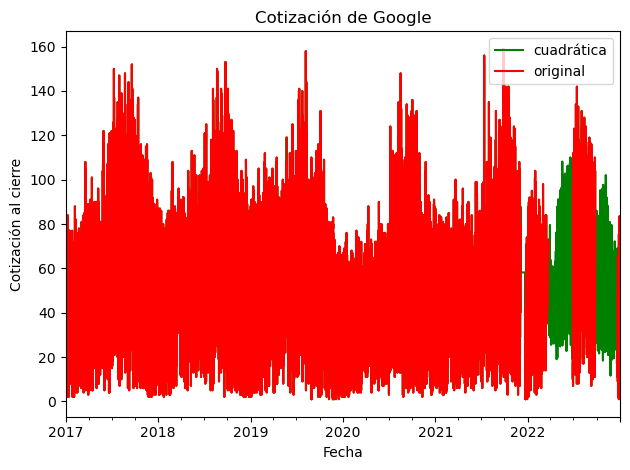

In [83]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["O3 (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["O3 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

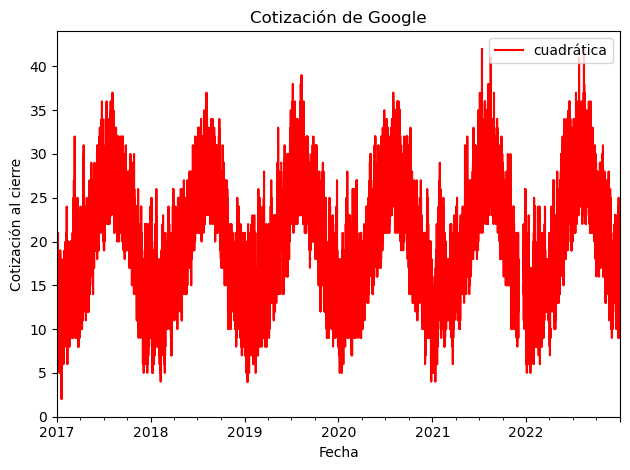

In [26]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["TMP (ºC)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

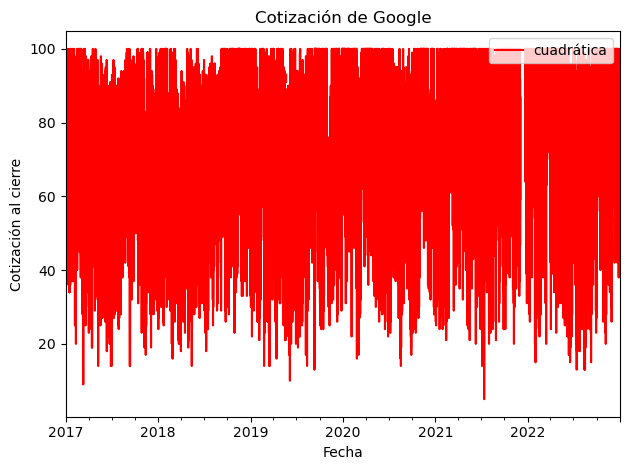

In [27]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["HR (% H.R.)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

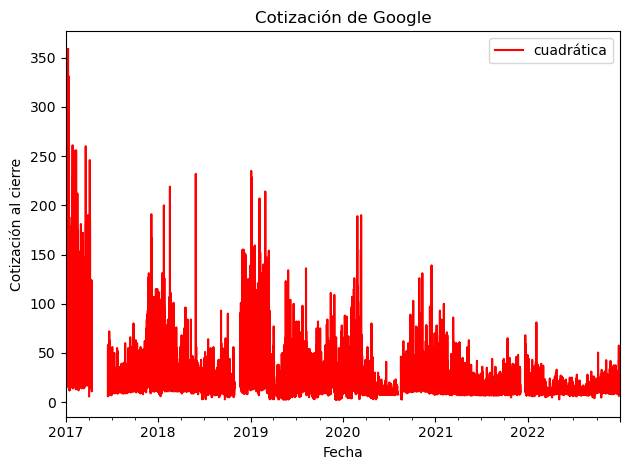

In [28]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NOX (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

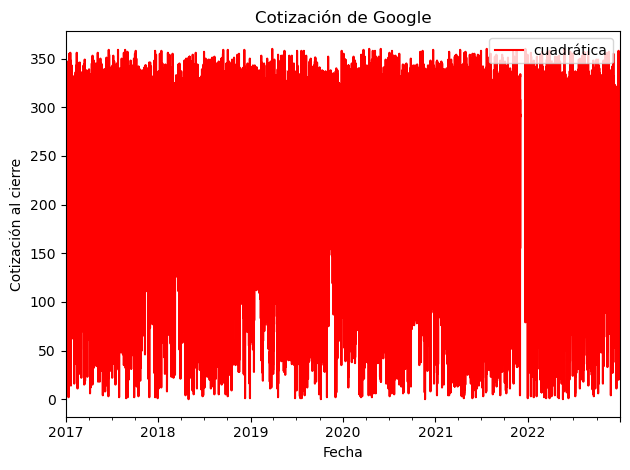

In [29]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["DD (grados)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

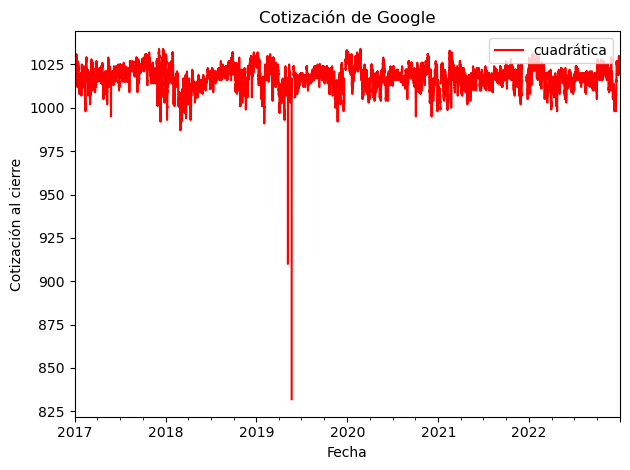

In [30]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["PRB (mb)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

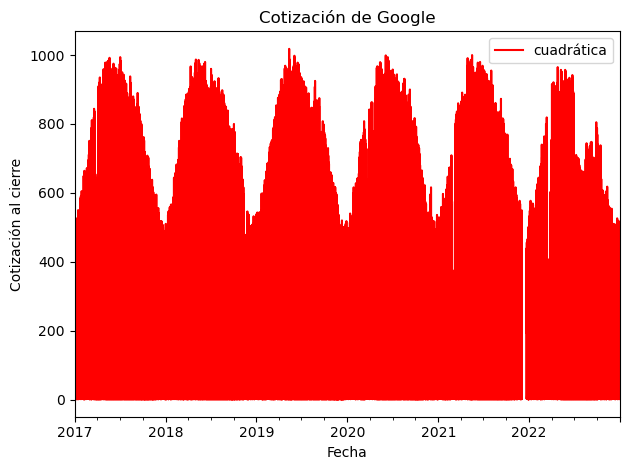

In [31]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["RS (W/m³)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

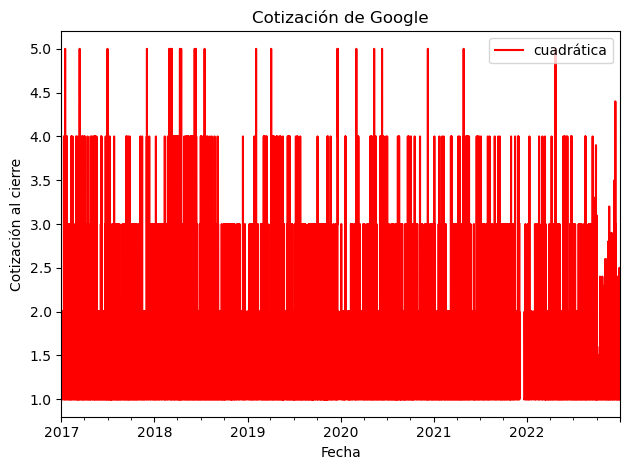

In [32]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["VV (m/s)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

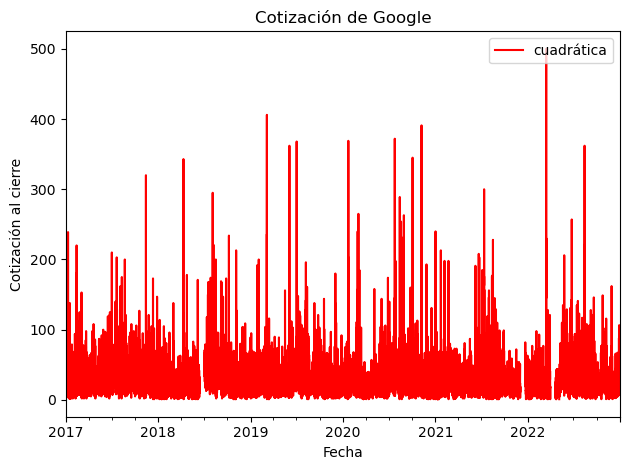

In [36]:
ax = data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["PM10 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

In [140]:
from statsmodels.tsa.stattools import adfuller

for column in imputed_datasets[10].columns:
    result = adfuller(imputed_datasets[10][column])
    print('Estadístico ADF : %f' % result[0])
    print('p-value: %f' % result[1])
    print('Valores críticos:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Estadístico ADF : -14.465314
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -11.382872
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -6.588364
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -14.689483
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -6.181340
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -19.516779
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -11.826931
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -15.681017
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -13.970325
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Estadístico ADF : -10.437008
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2

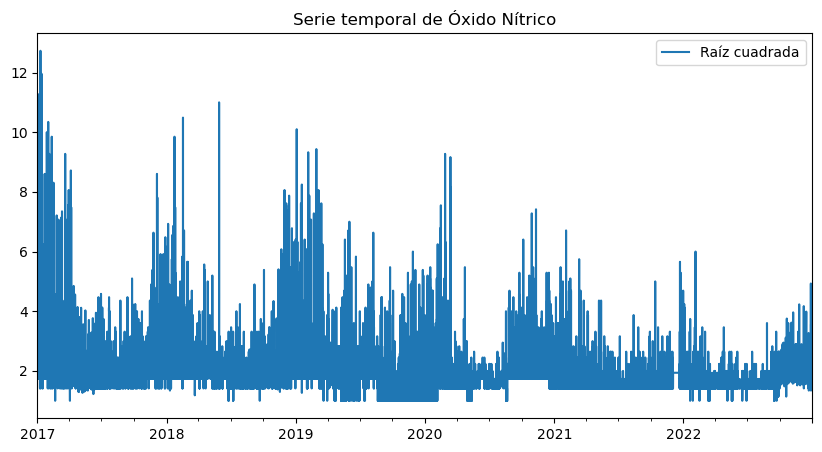

In [115]:
dataset_raiz = np.sqrt(imputed_datasets[10])
ax = dataset_raiz["NO (µg/m³N)"].plot(figsize=(10, 5))
ax.set_title('Serie temporal de Óxido Nítrico')
ax.legend(labels=['Raíz cuadrada'])

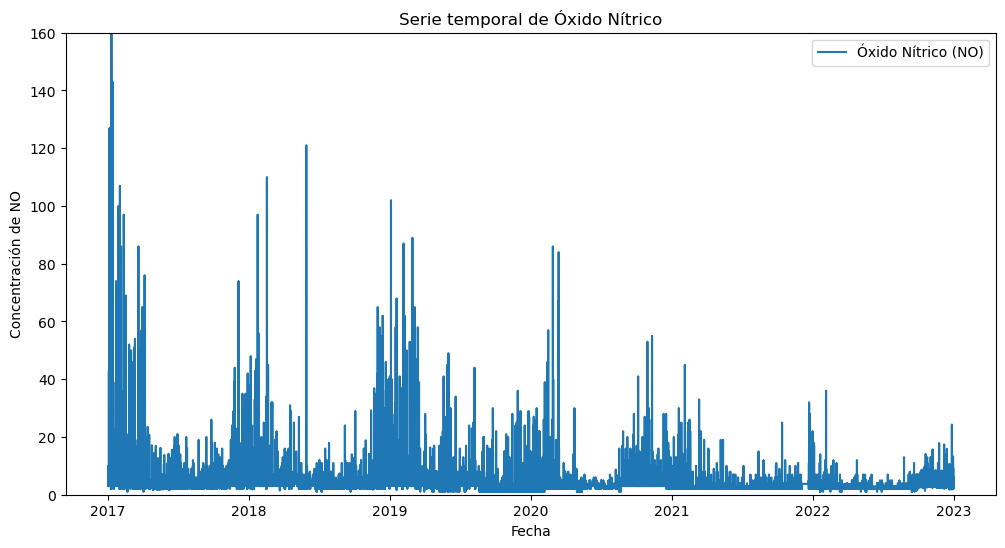

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"], label='Óxido Nítrico (NO)')
plt.title("Serie temporal de Óxido Nítrico")
plt.xlabel("Fecha")
plt.ylim(0,160)
plt.ylabel("Concentración de NO")
plt.legend()
plt.show()

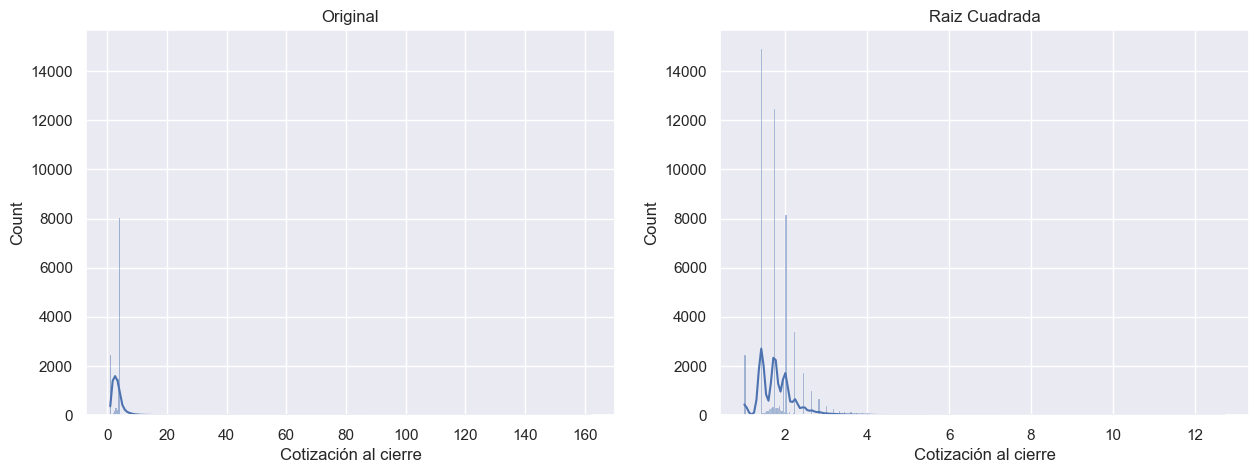

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los subplots
_, axs = plt.subplots(1, 2, figsize=(15, 5))

# Series y títulos
series = [imputed_datasets[10]["NO (µg/m³N)"], dataset_raiz["NO (µg/m³N)"]]
titulos = ['Original', 'Raiz Cuadrada']
axs = axs.flatten()

# Configurar seaborn
sns.set(font_scale=1)

# Configuración del gráfico
for df, ax, titulo in zip(series, axs, titulos):
    sns.histplot(df, kde=True, stat='count', ax=ax)
    ax.set_xlabel('Cotización al cierre')
    ax.set_title(titulo)
    
    # Verificar si hay una leyenda y ocultarla
    legend = ax.get_legend()
    if legend:
        legend.set_visible(False)

# Mostrar el gráfico
plt.show()


c:\Users\migue\anaconda3\envs\ML_palma\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


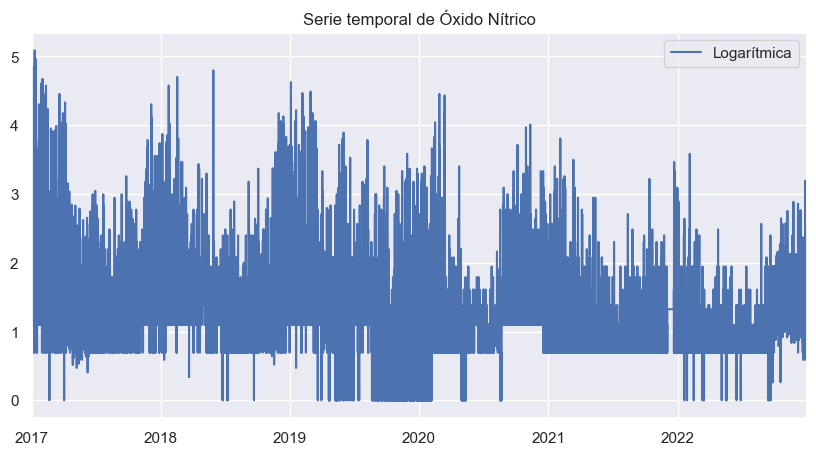

In [125]:
dataset_log = np.log(imputed_datasets[10])
ax = dataset_log["NO (µg/m³N)"].plot(figsize=(10, 5))
ax.set_title('Serie temporal de Óxido Nítrico')
ax.legend(labels=['Logarítmica'])

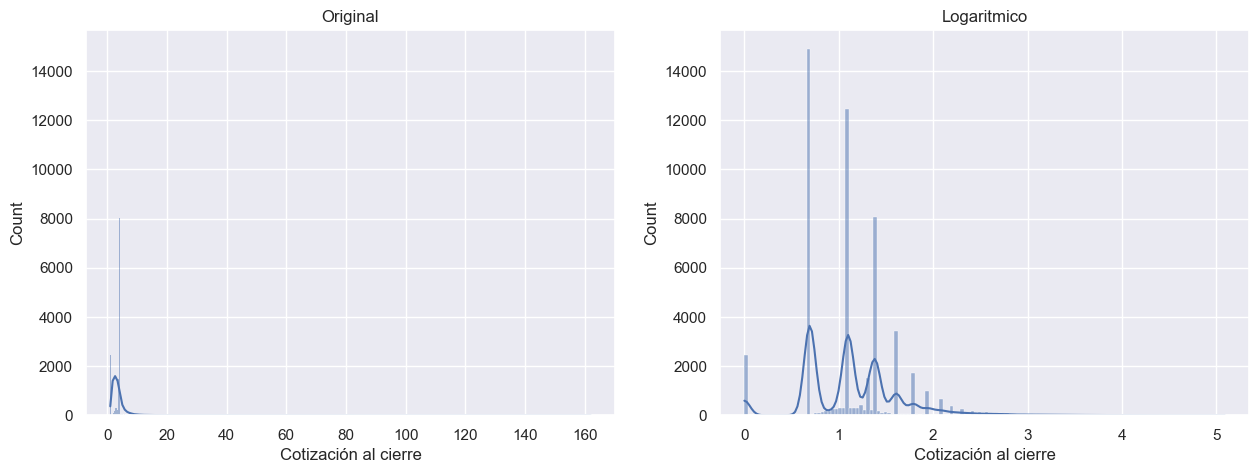

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los subplots
_, axs = plt.subplots(1, 2, figsize=(15, 5))

# Series y títulos
series = [imputed_datasets[10]["NO (µg/m³N)"], dataset_log["NO (µg/m³N)"]]
titulos = ['Original', 'Logaritmico']
axs = axs.flatten()

# Configurar seaborn
sns.set(font_scale=1)

# Configuración del gráfico
for df, ax, titulo in zip(series, axs, titulos):
    sns.histplot(df, kde=True, stat='count', ax=ax)
    ax.set_xlabel('Cotización al cierre')
    ax.set_title(titulo)
    
    # Verificar si hay una leyenda y ocultarla
    legend = ax.get_legend()
    if legend:
        legend.set_visible(False)

# Mostrar el gráfico
plt.show()

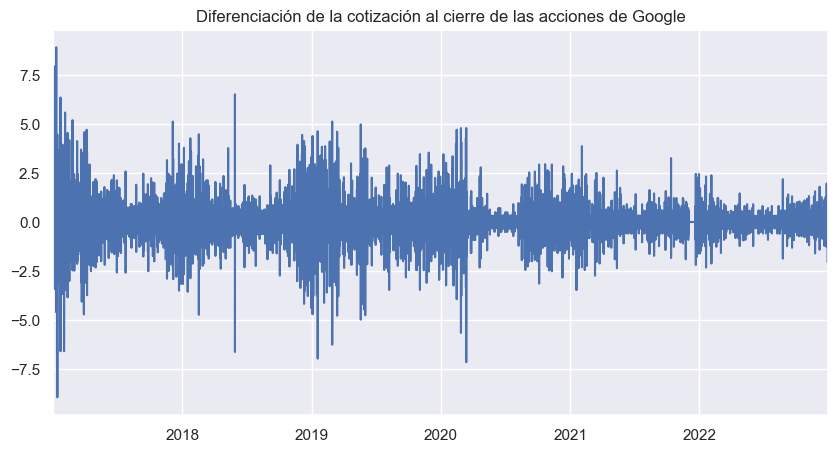

In [129]:
dataset_dif = dataset_raiz.diff().dropna()


ax = dataset_dif["NO (µg/m³N)"].plot(figsize=(10, 5))
ax.set_title('Diferenciación de la cotización al cierre de las acciones de Google')
# Verificar si hay una leyenda y ocultarla
legend = ax.get_legend()
if legend:
    legend.set_visible(False)

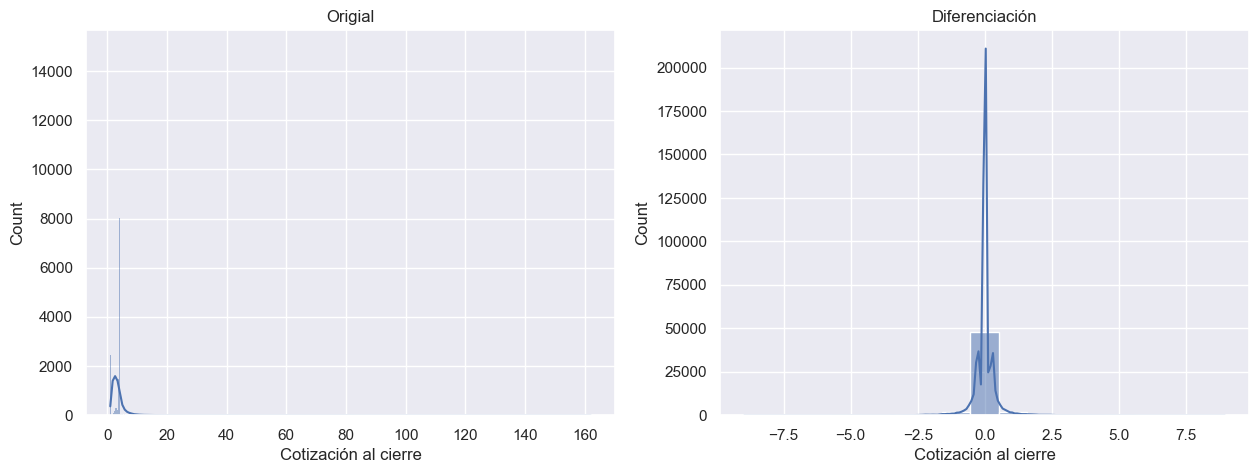

In [131]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))
series = [imputed_datasets[10]["NO (µg/m³N)"], dataset_dif["NO (µg/m³N)"]]
titulos = ['Origial','Diferenciación']
axs = axs.flatten()
sns.set(font_scale = 1)
for df, ax, titulo in  zip(series,axs,titulos):
    sns.histplot(df,kde=True,stat='count', ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel('Cotización al cierre')
    legend = ax.get_legend()
    if legend:
        legend.set_visible(False)
plt.show()

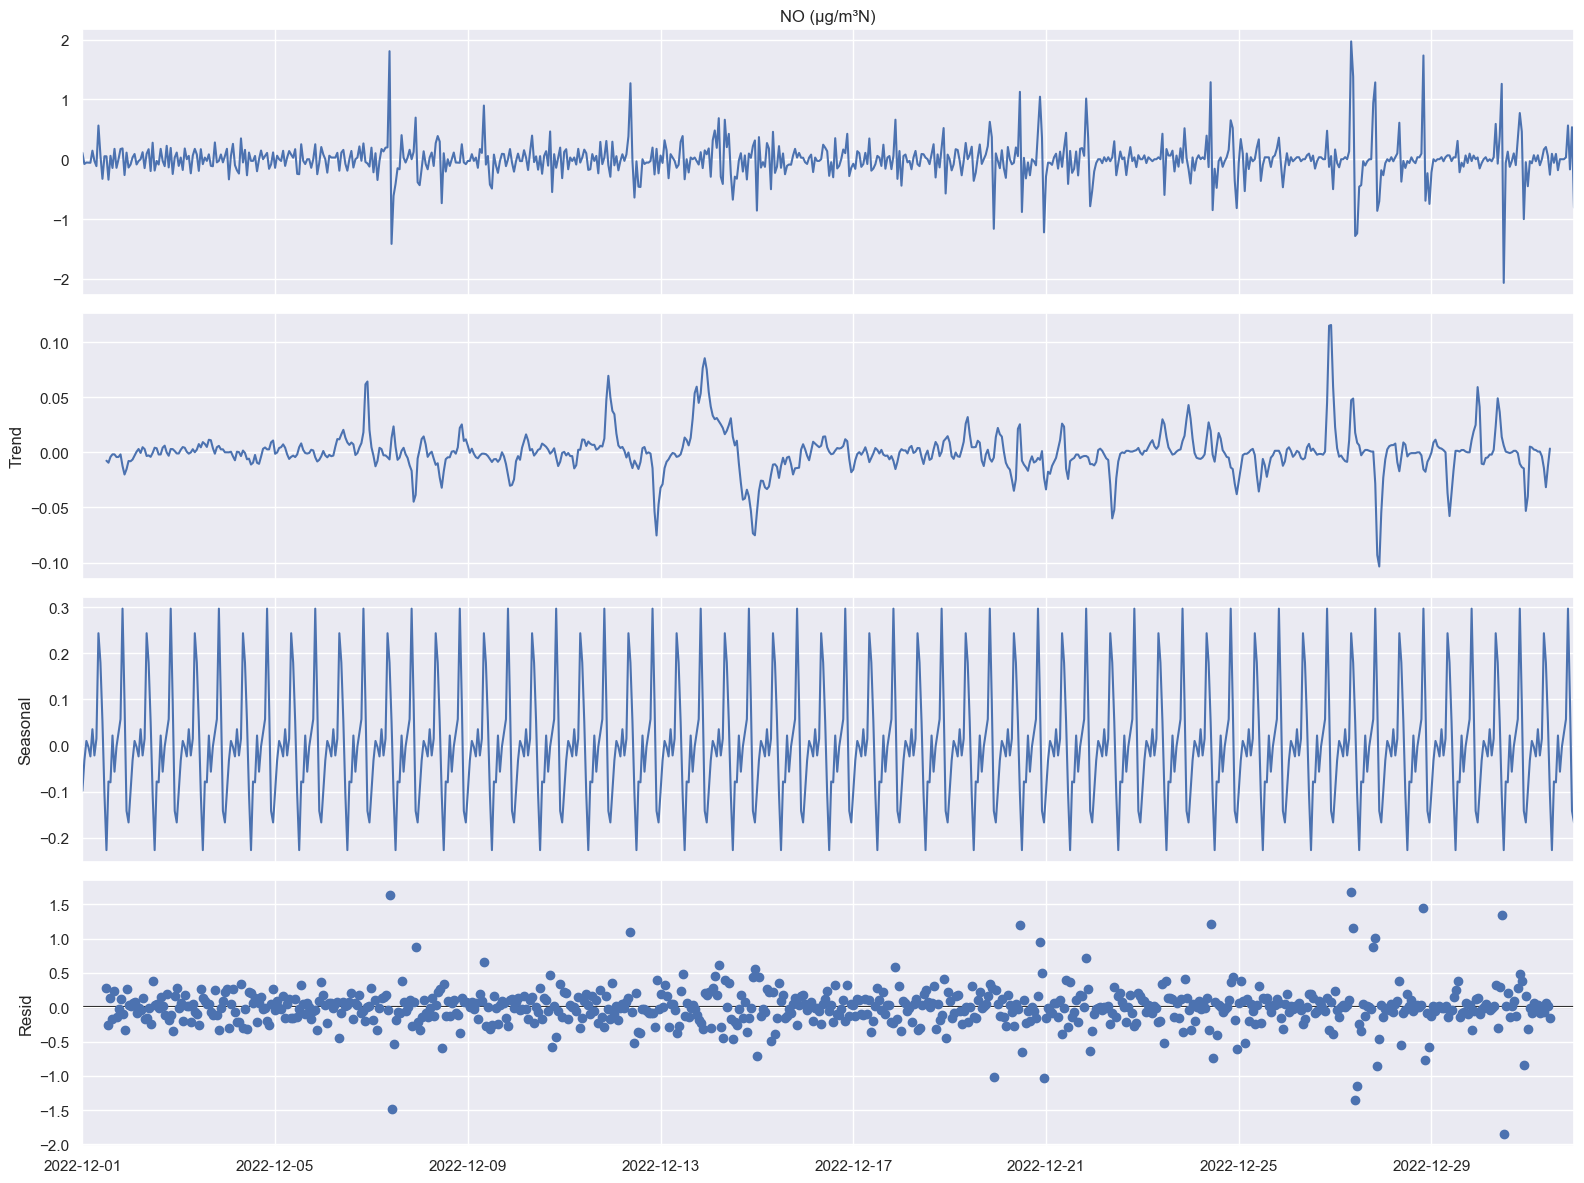

In [137]:
gift_dec = sm.tsa.seasonal_decompose(dataset_dif['2022-12-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"], model="aditive")
fig = gift_dec.plot()
fig.set_size_inches((16, 12))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [138]:
result = adfuller(dataset_dif["NO (µg/m³N)"])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -43.687941
p-value: 0.000000
Valores críticos:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [95]:
train = imputed_datasets[10][:-168]
test = imputed_datasets[10][-168:]

print(test)

                     NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  \
2022-12-25 00:00:00          2.6          11.0           3.8          5.8   
2022-12-25 01:00:00          3.8          11.3           3.6          6.7   
2022-12-25 02:00:00          4.2          11.8           3.0          3.9   
2022-12-25 03:00:00          2.3           8.9           2.6         10.7   
2022-12-25 04:00:00          2.6           8.1           2.6         13.5   
...                          ...           ...           ...          ...   
2022-12-31 19:00:00          2.5          10.0           4.6         57.6   
2022-12-31 20:00:00          4.6          17.5           5.0         28.2   
2022-12-31 21:00:00          3.9          12.9           4.9         27.4   
2022-12-31 22:00:00          6.3          18.4           5.2         23.2   
2022-12-31 23:00:00          2.9          11.2           4.9         32.7   

                     TMP (ºC)  HR (% H.R.)  NOX (µg/m³N)  DD (grados)  \
20